In [1]:
import torch
from torch import nn
from src.conf.config import CONFIG
from src.dl.inferer import Inferer
from src.dl.lightning_model import SegModel
from src.dl.models.model_builder import ModelBuilder

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [2]:
# get the config file
config = CONFIG

# Set the model to do instance or panoptic segmentation (depends what's in the config.py file)
base_model = ModelBuilder.set_model("Unet3+", config)

# Insert the model to pytorch lightning framework. (Simplifies the training and other stuff)
lightning_model = SegModel.from_conf(base_model, config)

ckpt = lightning_model.fm.model_checkpoint(config.inference_args.model_weights)
checkpoint = torch.load(ckpt, map_location = lambda storage, loc : storage)
lightning_model.load_state_dict(checkpoint['state_dict'], strict=False)

<All keys matched successfully>

In [3]:
inf = Inferer.from_conf(lightning_model, config)

In [4]:
inf.run_predictions_all()

Prediction for: test_1
/home/local/leos/Dippa/DippaEnv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function extract_patches is deprecated; The function feature_extraction.image.extract_patches has been deprecated in 0.22 and will be removed in 0.24.

Prediction for: test_10
Prediction for: test_11
Prediction for: test_12
Prediction for: test_13
Prediction for: test_14
Prediction for: test_2
Prediction for: test_3
Prediction for: test_4
Prediction for: test_5
Prediction for: test_6
Prediction for: test_7
Prediction for: test_8
Prediction for: test_9


In [6]:
inf.post_process()

/home/local/leos/Dippa/DippaEnv/lib/python3.6/site-packages/skimage/util/dtype.py:525: UserWarning:

Downcasting int32 to uint8 without scaling because max value 1 fits in uint8



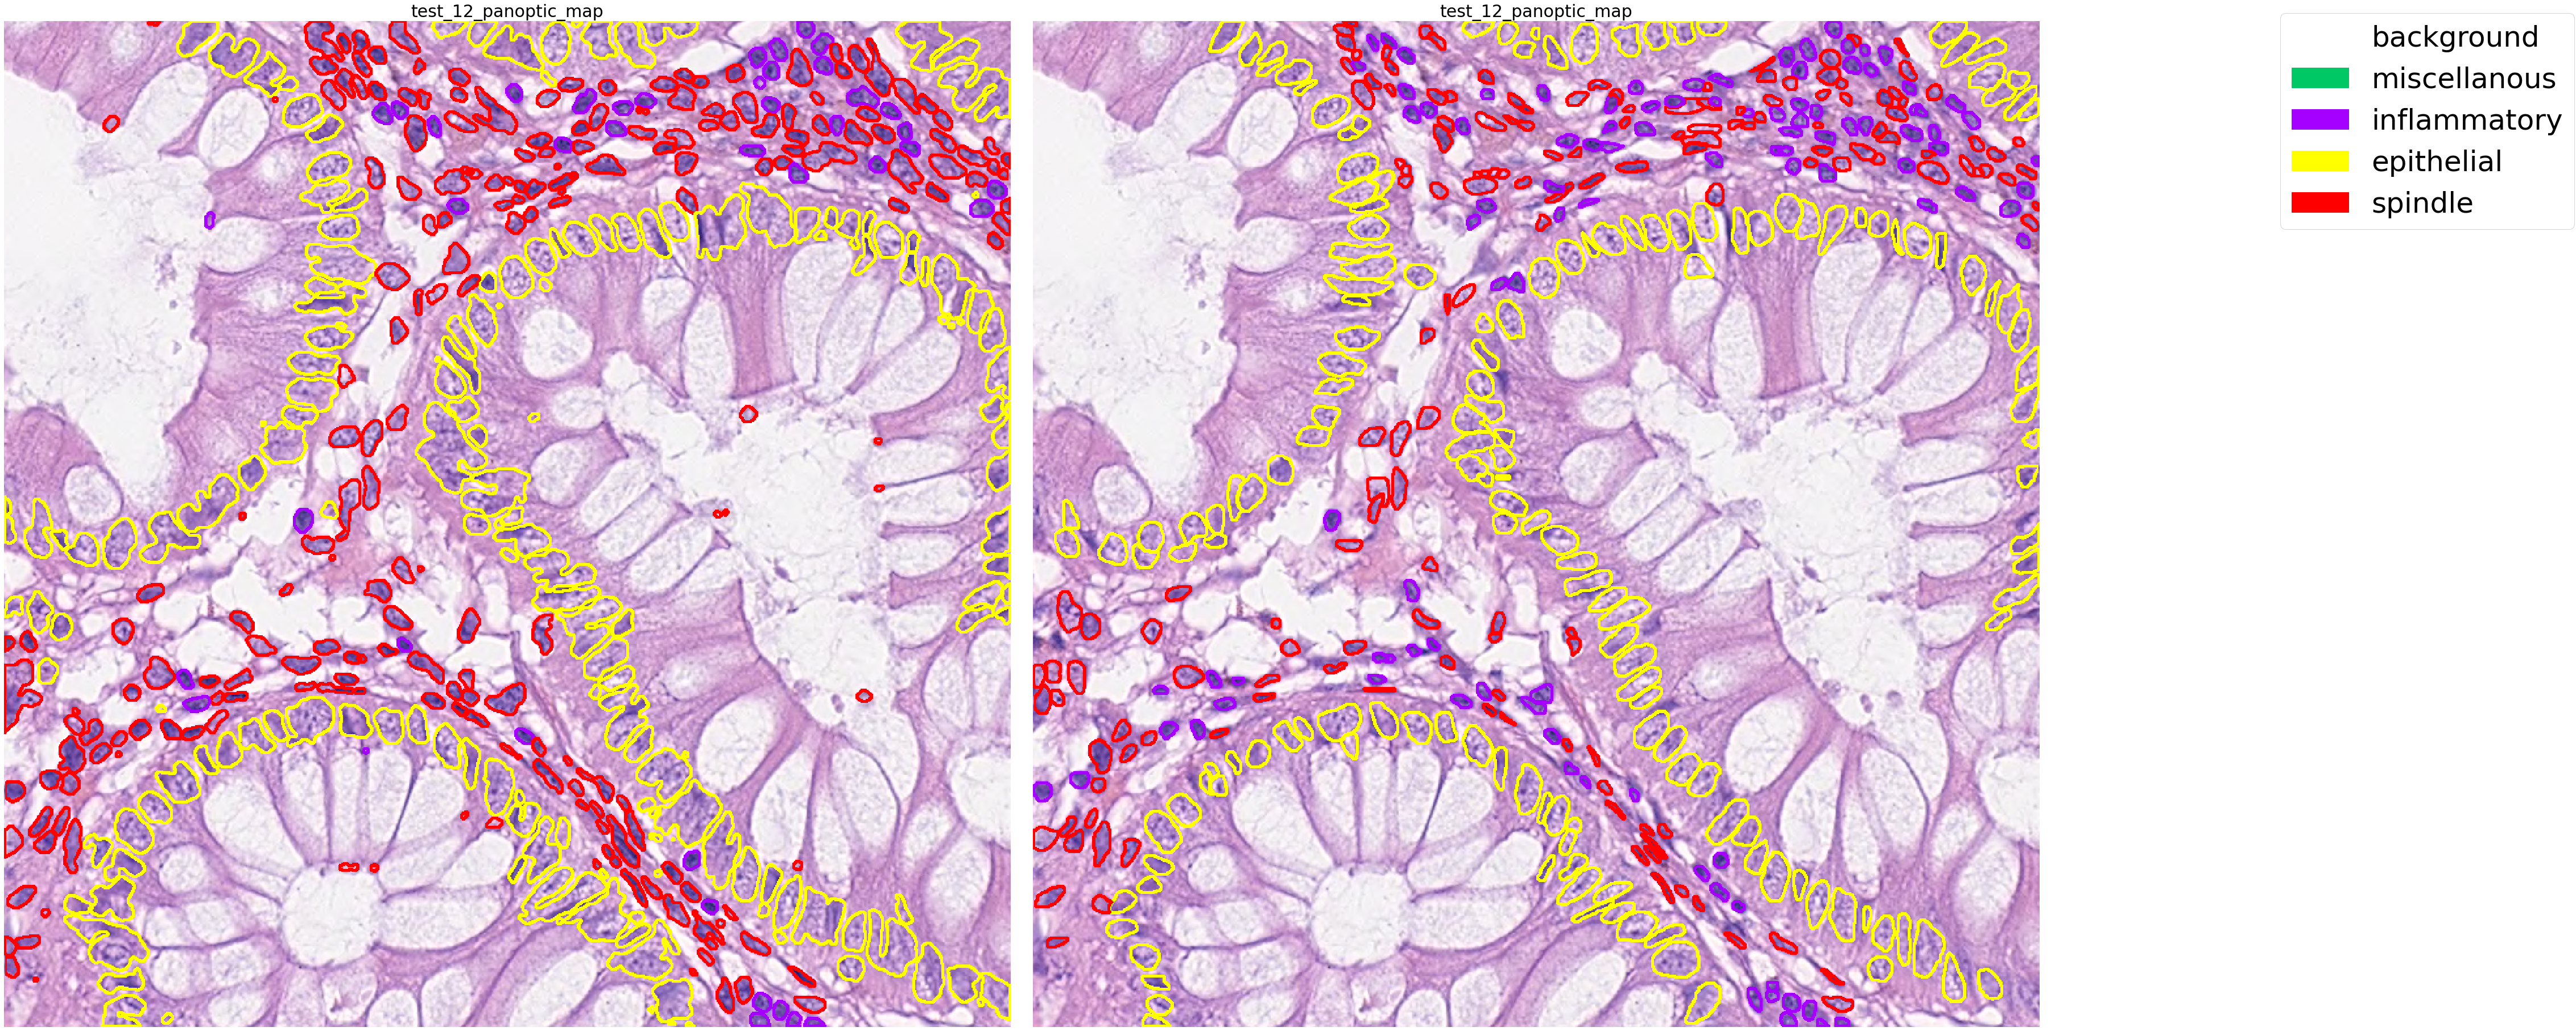

In [9]:
inf.plot_outputs("panoptic_maps", ixs = [3], contour=True, gt_mask=True)

In [7]:
score_dfs = inf.run_benchmarks(save=True)

In [8]:
score_dfs["instance_metrics"]

AJI  AJI_plus     DICE2        PQ        SQ  \
test_1_metrics        0.489547  0.528784  0.456954  0.463223  0.744687   
test_10_metrics       0.572827  0.587057  0.472815  0.551114  0.776409   
test_11_metrics       0.433013  0.496285  0.434322  0.346250  0.721288   
test_12_metrics       0.575188  0.596195  0.585071  0.524703  0.752132   
test_13_metrics       0.551498  0.593401  0.624214  0.530354  0.774814   
test_14_metrics       0.571219  0.574509  0.566547  0.534920  0.776192   
test_2_metrics        0.504711  0.512843  0.619578  0.437393  0.735137   
test_3_metrics        0.538479  0.565773  0.462642  0.471135  0.753817   
test_4_metrics        0.519877  0.535580  0.449059  0.423002  0.749798   
test_5_metrics        0.492838  0.537931  0.487377  0.507443  0.756481   
test_6_metrics        0.511989  0.530869  0.598477  0.466965  0.757650   
test_7_metrics        0.404622  0.430235  0.570100  0.360543  0.715835   
test_8_metrics        0.438183  0.460031  0.348438  0.376829  0.722897   
test_9_metrics        0.524300  0.547537  0.591389  0.529227  0.768335   
averages_for_the_set  0.509164  0.535502  0.519070  0.465936  0.750391   

                            DQ  inst_recall  inst_precision    splits  \
test_1_metrics        0.622038     0.606936        0.637910  0.663145   
test_10_metrics       0.709824     0.739645        0.682314  0.946604   
test_11_metrics       0.480044     0.407614        0.583777  0.786384   
test_12_metrics       0.697622     0.719626        0.676923  0.545941   
test_13_metrics       0.684492     0.612215        0.776119  0.706721   
test_14_metrics       0.689160     0.863309        0.573477  1.387703   
test_2_metrics        0.594982     0.677551        0.530351  0.400518   
test_3_metrics        0.625000     0.672589        0.583700  0.603495   
test_4_metrics        0.564155     0.662679        0.491135  0.824099   
test_5_metrics        0.670793     0.654945        0.687428  0.871501   
test_6_metrics        0.616333     0.666667        0.573066  0.443669   
test_7_metrics        0.503667     0.427386        0.613095  0.202020   
test_8_metrics        0.521277     0.547923        0.497101  0.872284   
test_9_metrics        0.688797     0.647173        0.736142  0.318765   
averages_for_the_set  0.619156     0.636161        0.617324  0.683775   

                        merges  
test_1_metrics        0.685771  
test_10_metrics       0.424100  
test_11_metrics       0.799662  
test_12_metrics       0.347391  
test_13_metrics       0.868484  
test_14_metrics       0.311557  
test_2_metrics        0.419507  
test_3_metrics        0.570355  
test_4_metrics        0.565305  
test_5_metrics        0.936922  
test_6_metrics        0.227927  
test_7_metrics        0.207541  
test_8_metrics        0.767842  
test_9_metrics        0.439723  
averages_for_the_set  0.540863

In [9]:
# These will give error if you only did instance segmentation

df = score_dfs["type_metrics"].rename_axis("fn").reset_index()
df[df.fn.str.contains("avg")]

fn       AJI  AJI_plus     DICE2        PQ  \
14   miscellanous_avg_for_the_set  0.110286   0.11097  0.380283  0.115604   
43   inflammatory_avg_for_the_set  0.298232  0.301202  0.620713  0.330486   
86     epithelial_avg_for_the_set    0.3505  0.360405  0.566669   0.35411   
143       spindle_avg_for_the_set  0.347337  0.356461  0.575628    0.3462   

           SQ        DQ inst_recall inst_precision     splits     merges  
14   0.425563   0.15507    0.146488       0.342593  0.0117165  0.0874572  
43   0.652897  0.414186    0.404438       0.533606  0.0681712  0.0884791  
86   0.678679  0.453599    0.462531       0.528955   0.230911   0.181574  
143  0.692892  0.452466    0.467739       0.503518   0.258702   0.219633